# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [16]:
import pandas as pd

data = pd.read_csv("AmesHousing.csv")
data.info()

'''the info() function provides details about the number of columns and rows.
It also gives the details of the datatype of the column.

The dataset has 2930 rows and 82 columns.'''

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [8]:
# Get the number of unique values for each column
unique_counts = data.nunique()

# Find the columns with the maximum number of unique values
max_unique_count = unique_counts.max()
max_unique_columns = unique_counts[unique_counts == max_unique_count].index.tolist()

# Display the number of unique values for each column
print("Number of Unique Values in Each Column:")
print(unique_counts)

# Display the columns with the most diversity
print("\nColumns with the Most unique:")
print(f"The columns {', '.join(max_unique_columns)} have {max_unique_count} unique values.")


Number of Unique Values in Each Column:
Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64

Columns with the Most unique:
The columns Order, PID have 2930 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [11]:
# Identify columns where the value for every row is the same
constant_columns = data.columns[data.nunique() == 1]

if not constant_columns.empty:
    print("Columns with the Same Value for Every Row:")
    print(constant_columns)
else:
    print("No columns with the same value for every row.")


No columns with the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

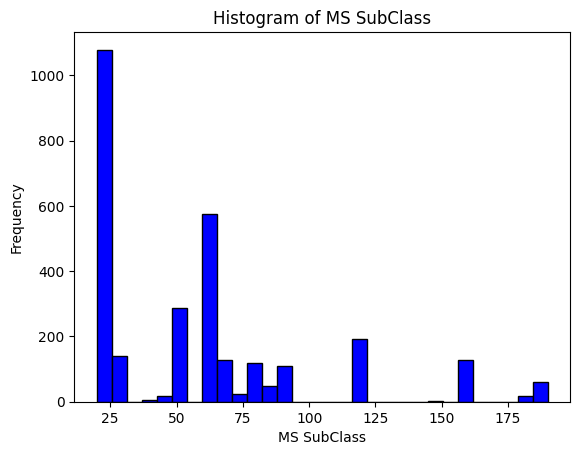

In [15]:
import matplotlib.pyplot as plt

# Choose a numeric column
numeric_column = "MS SubClass"

# Check if the chosen column is numeric
if data[numeric_column].dtype in [int, float]:
    # Create a histogram
    plt.hist(data[numeric_column], bins=30, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel(numeric_column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {numeric_column}')

    # Show the plot
    plt.show()
else:
    print(f"The chosen column '{numeric_column}' is not numeric.")


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

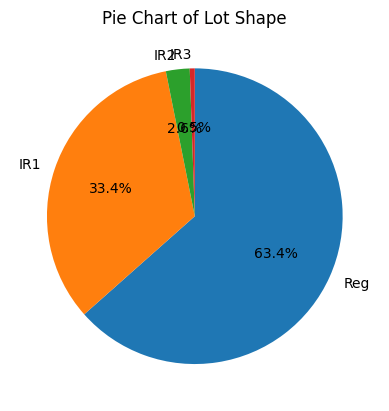

In [19]:
''' This pie chart helps in understanding the distribution of a categorical data.
Here, By observing this pie chart we can analyze the different type in the categorical data
and measure the uniform or balance in the dataset.

'''

# Choose a categorical column
categorical_column = "Lot Shape"

# Check if the chosen column is categorical
if data[categorical_column].dtype == 'object':
    # Count the occurrences of each category
    category_counts = data[categorical_column].value_counts()

    # plot a pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

    # Add title
    plt.title(f'Pie Chart of {categorical_column}')

    # Show the plot
    plt.show()
else:
    print(f"The chosen column '{categorical_column}' is not categorical.")




---



## Submitting Your Work

Submit your work as usual.